In [43]:
import geopandas
import pandas
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import maup
import matplotlib.pyplot as plt

In [25]:
precincts = geopandas.read_file('precincts_geo')
districts = geopandas.read_file('districts.json')
precincts.to_crs(districts.crs, inplace=True)

In [29]:
assignment = maup.assign(precincts, districts)
assignment.isna().sum()

/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compare

0

In [30]:
precincts['DISTRICT'] = assignment

In [36]:
from gerrychain import Graph, Partition
graph = Graph.from_file('precincts_geo', ignore_errors=True)

/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometries[i].id = i
/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:66: UserWarning: Found overlaps among the given polygons. Indices of overlaps: {(1687, 1688), (6073, 6112), (1731, 3860), (6397, 6438), (3601, 3714), (4948, 4956), (6388, 6389), (719, 738), (878, 911), (932, 1031), (218, 227), (191, 210), (1071, 4344), (6679, 6681), (4678, 4686), (1070, 1081), (1941, 3675), (4862, 5261), (6846, 6858), (1612, 3207), (1174, 1175), (41, 42), (316, 4182), (5359, 5429), (313, 321), (324, 330), (4504, 4506), (1572, 3399), (6771, 6800), (3019, 3596), (376, 377), (3106, 3484), (1684, 3231), (5814, 5829), (6454, 6455), (106, 107), (91, 164), (1309, 1484), (4224, 4228), (4881, 5252), (1446, 2950), (4

In [41]:
graph.join(precincts, columns =["DISTRICT"], left_index="PrecCode", right_index="PrecCode")

In [42]:
plan = Partition(graph, "DISTRICT")

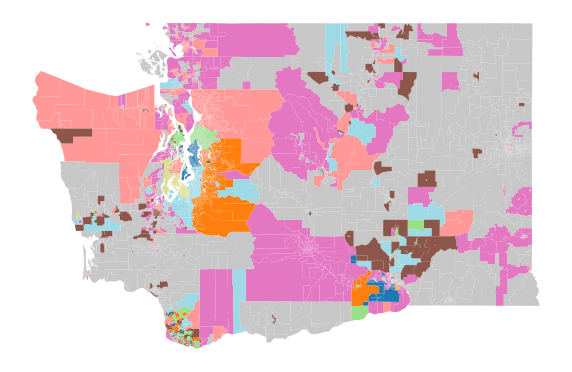

In [44]:
plan.plot(precincts, figsize=(10,10), cmap ="tab20")
plt.axis('off')
plt.show()